In [1]:
import numpy as np
import os
from PIL import Image

FILES_DIR = os.path.abspath('tmp')

In [2]:
def getInfo(image):
    fixedSize = 100
    imageHeight, imageWidth = image.size

    imageDepth = 2 ** (np.asarray(image).dtype.itemsize * len(image.getbands()) * 8)
    samplingRate = (imageWidth / fixedSize, imageHeight / fixedSize)

    return imageDepth, samplingRate

def generateStructure(rowBlocks, columnBlocks, blockSize, grayValues):
    image = None
    gray = 0

    for _ in range(rowBlocks):
        row = None

        for _ in range(columnBlocks):
            column = np.full(shape = blockSize, fill_value = grayValues[gray])
            row = column if row is None else np.hstack([row, column])

            gray += 1

        image = row if image is None else np.vstack([image, row])

    return image

def generateImage(imageName, rowBlocks, columnBlocks, blockSize, grayValues):
    image = generateStructure(rowBlocks, columnBlocks, blockSize, grayValues)

    if imageName == 'C':
        image[52:77, 52:102] = 161
        image[52:77, 154:205] = 161

        image[179:205, 52:102] = 212
        image[179:205, 154:205] = 212

    image = Image.fromarray(image.astype(np.uint8), mode = 'L')
    image.save(f'{FILES_DIR}/tonsCinza/image{imageName}.bmp')

    print(f'Imagem {imageName} (Profundidade, Taxa de Amostragem [px/cm]): {getInfo(image)}')
    image.show()

Imagem A (Profundidade, Taxa de Amostragem [px/cm]): (256, (2.56, 2.56))


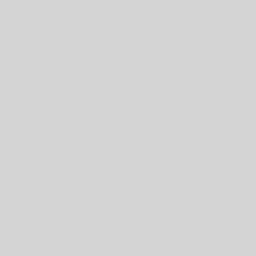

Imagem B (Profundidade, Taxa de Amostragem [px/cm]): (256, (2.56, 2.56))


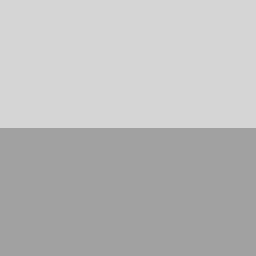

Imagem C (Profundidade, Taxa de Amostragem [px/cm]): (256, (2.56, 2.56))


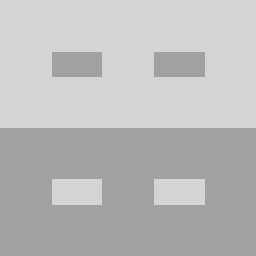

Imagem D (Profundidade, Taxa de Amostragem [px/cm]): (256, (2.56, 2.56))


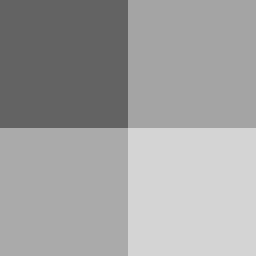

Imagem E (Profundidade, Taxa de Amostragem [px/cm]): (256, (2.56, 2.56))


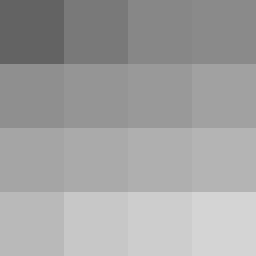

In [3]:
images = {
    'A': [1, 1, (256, 256), [212]],
    'B': [2, 1, (128, 256), [212, 161]],
    'C': [2, 1, (128, 256), [212, 161]],
    'D': [2, 2, (128, 128), [99, 164, 170, 212]],
    'E': [4, 4, (64, 64),   [99, 121, 135, 138, 143, 149, 153, 161, 165, 170, 175, 180, 185, 199, 205, 212]]
}

os.makedirs(f'{FILES_DIR}/tonsCinza/', exist_ok = True)

for imageName, imageValues in images.items():
    generateImage(
        imageName = imageName, 
        rowBlocks = imageValues[0], 
        columnBlocks = imageValues[1], 
        blockSize = imageValues[2], 
        grayValues = imageValues[3]
    )